In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

sns.set()
sns.set_style("darkgrid")
%matplotlib inline

## Plastic By Country / River / Region

In [3]:
df_input = pd.read_csv("river-plastics-by-region.csv")
len(df_input)

26

In [4]:
df_input

,Entity,Code,Year,Share of total mass input from rivers
0,Africa,NaN,2015,7.80
1,"Amazon (Brazil, Peru, Colombia, Ecuador)",NaN,2015,2.77
2,Asia,NaN,2015,86.00
3,Australia-Pacific,NaN,2015,0.02
4,Brantas (Indonesia),NaN,2015,2.77
5,Central & North America,NaN,2015,0.95
6,"Cross (Nigeria, Cameroon)",NaN,2015,2.87
7,Dong (China),NaN,2015,1.36
8,Europe,NaN,2015,0.28
9,"Ganges (India, Bangladesh)",NaN,2015,8.19


In [16]:
def river_only(s):
    if "(" in s:
        return True
    else:
        return False
    
def region_only(s):
    if "(" in s:
        return False
    else:
        return True

df_river = deepcopy(df_input[df_input["Entity"].apply(river_only)]).reset_index()
df_region = deepcopy(df_input[df_input["Entity"].apply(region_only)]).reset_index()

In [41]:
df_region_sorted = df_region.sort_values(by="Share of total mass input from rivers", ascending=False, axis=0)

[Text(0, 0, 'Asia'),
 Text(1, 0, 'Africa'),
 Text(2, 0, 'South America'),
 Text(3, 0, 'Central & North America'),
 Text(4, 0, 'Europe'),
 Text(5, 0, 'Australia-Pacific')]

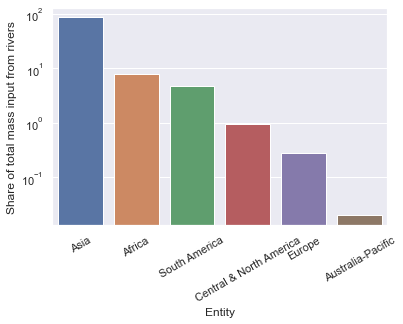

In [47]:
g1 = sns.barplot(data=df_region_sorted, x="Entity", y="Share of total mass input from rivers")
g1.set_yscale("log")
g1.set_xticklabels(g1.get_xticklabels(), rotation=30)

In [17]:
df_river

,index,Entity,Code,Year,Share of total mass input from rivers
0,1,"Amazon (Brazil, Peru, Colombia, Ecuador)",NaN,2015,2.77
1,4,Brantas (Indonesia),NaN,2015,2.77
2,6,"Cross (Nigeria, Cameroon)",NaN,2015,2.87
3,7,Dong (China),NaN,2015,1.36
4,9,"Ganges (India, Bangladesh)",NaN,2015,8.19
5,10,Hanjiang (China),NaN,2015,0.92
6,11,Huangpu (China),NaN,2015,2.91
7,12,Imo (Nigeria),NaN,2015,1.53
8,13,Irrawaddy (Myanmar),NaN,2015,2.51
9,14,Kwa Ibo (Nigeria),NaN,2015,0.85


In [18]:
df_region

,index,Entity,Code,Year,Share of total mass input from rivers
0,0,Africa,NaN,2015,7.80
1,2,Asia,NaN,2015,86.00
2,3,Australia-Pacific,NaN,2015,0.02
3,5,Central & North America,NaN,2015,0.95
4,8,Europe,NaN,2015,0.28
5,21,South America,NaN,2015,4.80


In [32]:
def get_river(s):
    idx = s.index("(")
    return s[:idx]

def get_countries(s):
    return [country.strip() for country in s[s.index("(") + 1 : s.index(")")].split(",")]

rivers = df_river["Entity"].apply(get_river)
countries = df_river["Entity"].apply(get_countries)
df_river["river"] = rivers
df_river["countries"] = countries

In [33]:
df_river

,index,Entity,Code,Year,Share of total mass input from rivers,river,countries
0,1,"Amazon (Brazil, Peru, Colombia, Ecuador)",NaN,2015,2.77,Amazon,"[Brazil, Peru, Colombia, Ecuador]"
1,4,Brantas (Indonesia),NaN,2015,2.77,Brantas,[Indonesia]
2,6,"Cross (Nigeria, Cameroon)",NaN,2015,2.87,Cross,"[Nigeria, Cameroon]"
3,7,Dong (China),NaN,2015,1.36,Dong,[China]
4,9,"Ganges (India, Bangladesh)",NaN,2015,8.19,Ganges,"[India, Bangladesh]"
5,10,Hanjiang (China),NaN,2015,0.92,Hanjiang,[China]
6,11,Huangpu (China),NaN,2015,2.91,Huangpu,[China]
7,12,Imo (Nigeria),NaN,2015,1.53,Imo,[Nigeria]
8,13,Irrawaddy (Myanmar),NaN,2015,2.51,Irrawaddy,[Myanmar]
9,14,Kwa Ibo (Nigeria),NaN,2015,0.85,Kwa Ibo,[Nigeria]


In [34]:
df_country = df_river.explode("countries")

[Text(0, 0, 'Yangtze '),
 Text(1, 0, 'Ganges '),
 Text(2, 0, 'Xi '),
 Text(3, 0, 'Huangpu '),
 Text(4, 0, 'Cross '),
 Text(5, 0, 'Amazon '),
 Text(6, 0, 'Brantas '),
 Text(7, 0, 'Pasig '),
 Text(8, 0, 'Irrawaddy '),
 Text(9, 0, 'Solo '),
 Text(10, 0, 'Mekong '),
 Text(11, 0, 'Imo '),
 Text(12, 0, 'Dong '),
 Text(13, 0, 'Serayu '),
 Text(14, 0, 'Magdalena '),
 Text(15, 0, 'Tamsui '),
 Text(16, 0, 'Zhujiang '),
 Text(17, 0, 'Hanjiang '),
 Text(18, 0, 'Progo '),
 Text(19, 0, 'Kwa Ibo ')]

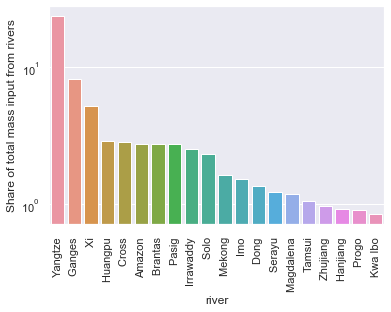

In [57]:
df_river_sorted = df_river.sort_values(by="Share of total mass input from rivers", ascending=False, axis=0)
g2 = sns.barplot(data=df_river_sorted, x="river", y="Share of total mass input from rivers")
g2.set_yscale("log")
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)

[Text(0, 0, 'China'),
 Text(1, 0, 'Bangladesh'),
 Text(2, 0, 'India'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Nigeria'),
 Text(5, 0, 'Myanmar'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Cameroon'),
 Text(8, 0, 'Ecuador'),
 Text(9, 0, 'Brazil'),
 Text(10, 0, 'Peru'),
 Text(11, 0, 'Philippines'),
 Text(12, 0, 'Cambodia'),
 Text(13, 0, 'Laos'),
 Text(14, 0, 'Thailand'),
 Text(15, 0, 'Vietnam'),
 Text(16, 0, 'Taiwan')]

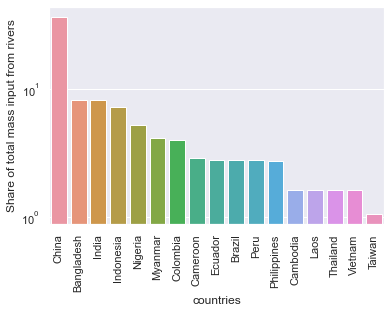

In [66]:
df_country_sorted = df_country.groupby("countries") \
                            .agg("sum") \
                            .sort_values(by="Share of total mass input from rivers", ascending=False, axis=0) \
                            .reset_index()
# df_country_sorted
g3 = sns.barplot(data=df_country_sorted, x="countries", y="Share of total mass input from rivers")
g3.set_yscale("log")
g3.set_xticklabels(g3.get_xticklabels(), rotation=90)

## Marine Micro Plastic Analysis

In [67]:
df_marine = pd.read_csv("SEA_MICRO.csv")
df_marine.head()

,Date,Latitude,Longitude,Pieces_KM2
0,1986-10-15,40.62,-70.07,0
1,1986-10-16,39.67,-69.43,0
2,1986-10-18,36.45,-64.88,3597
3,1986-10-19,35.48,-63.70,3597
4,1986-10-21,30.97,-60.68,17989


In [68]:
df_marine.dtypes

Date           object
Latitude      float64
Longitude     float64
Pieces_KM2      int64
dtype: object

In [69]:
df_marine["Year"] = df_marine["Date"].apply(lambda date_: int(date_[:date_.index("-")]))
df_marine.head()

,Date,Latitude,Longitude,Pieces_KM2,Year
0,1986-10-15,40.62,-70.07,0,1986
1,1986-10-16,39.67,-69.43,0,1986
2,1986-10-18,36.45,-64.88,3597,1986
3,1986-10-19,35.48,-63.70,3597,1986
4,1986-10-21,30.97,-60.68,17989,1986


In [81]:
df_marine_plot = df_marine[["Year", "Pieces_KM2"]].groupby("Year").agg("mean").sort_values(by="Year").reset_index()
df_marine_plot.head()

,Year,Pieces_KM2
0,1986,6822.850000
1,1987,6520.992424
2,1989,7185.948387
3,1990,6981.670000
4,1991,5323.160305


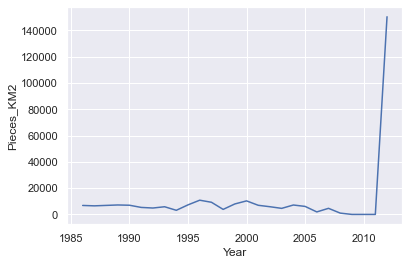

In [82]:
g4 = sns.lineplot(data=df_marine_plot, x="Year", y="Pieces_KM2")
g4.set_yscale("linear")

In [83]:
df_marine_plot[df_marine_plot["Year"] > 2000]

,Year,Pieces_KM2
14,2001,6937.008547
15,2002,5843.756757
16,2003,4603.909308
17,2004,7155.614973
18,2005,6096.226601
19,2006,1897.951673
20,2007,4630.841808
21,2008,995.652997
22,2009,0.000000
23,2010,0.000000


## GeoMarine Micro Analysis

In [84]:
df_geomarine = pd.read_csv("GEOMARINE_MICRO.csv")
df_geomarine.head(10)

,Date,Latitude,Longitude,MP_conc__particles_cubic_metre_,Normalized
0,2017-10-01,38.335844,-9.250058,180,0.515759
1,2017-10-01,36.796376,-7.944142,307,0.879656
2,2017-10-01,36.707197,-2.737703,280,0.802292
3,2017-10-23,36.116504,-4.254036,212,0.607450
4,2017-10-25,35.392750,-12.180278,63,0.180516
5,2017-11-06,34.393457,-16.063301,51,0.146132
6,2017-11-08,25.682937,-26.530779,11,0.031519
7,2017-11-10,14.513714,-27.901810,32,0.091691
8,2017-11-12,2.020325,-27.966971,27,0.077364
9,2017-11-14,-3.702340,-30.067708,16,0.045845


In [86]:
df_geomarine.tail()

,Date,Latitude,Longitude,MP_conc__particles_cubic_metre_,Normalized
79,2018-07-05,45.986297,-6.709303,7,0.020057
80,2018-07-06,44.452244,-7.960459,3,0.008596
81,2018-07-06,42.845245,-9.086077,10,0.028653
82,2018-07-07,41.097380,-9.139894,3,0.008596
83,2018-07-07,39.304830,-9.404044,8,0.022923


In [87]:
df_geomarine.isna().sum()

Date                               0
Latitude                           0
Longitude                          0
MP_conc__particles_cubic_metre_    0
Normalized                         0
dtype: int64

## Adventure Marine Analysis

In [89]:
df_adv = pd.read_csv("ADVENTURE_MICRO_FROM_SCIENTIST.csv")
df_adv.head()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized
0,1970-01-01,63.221610,-41.405960,3,0.009288
1,1970-01-01,63.470810,-41.934710,0,0.000000
2,1970-01-01,65.610920,-37.645740,1,0.003096
3,1970-01-01,9.958530,-84.891080,9,0.027864
4,2013-07-01,59.378683,-153.520867,1,0.003096


In [90]:
df_adv.tail()

,Date,Latitude,Longitude,Total_Pieces_L,Normalized
1388,2017-03-26,-54.780060,-64.408360,20,0.061920
1389,2017-03-27,-54.779895,-64.055666,5,0.015480
1390,2017-03-27,-54.776712,-64.048786,3,0.009288
1391,2017-03-29,-52.972346,-60.037062,2,0.006192
1392,2017-03-30,-51.934450,-58.012670,0,0.000000


In [97]:
df_adv["Year"] = df_adv["Date"].apply(lambda entry: int(entry[:4]))
df_adv_sorted = df_adv.groupby("Year").agg("mean").sort_values(by="Year", ascending=True).reset_index()
df_adv_sorted.head()

,Year,Latitude,Longitude,Total_Pieces_L,Normalized,Decade
0,1970,50.565467,-51.469373,3.250000,0.010062,1970.0
1,2013,3.483524,-81.974384,26.580000,0.082291,2010.0
2,2014,19.860025,-45.723458,15.139310,0.046871,2010.0
3,2015,25.098870,-66.358332,9.198113,0.028477,2010.0
4,2016,14.179596,-44.621119,9.738776,0.030151,2010.0


<AxesSubplot:xlabel='Year', ylabel='Total_Pieces_L'>

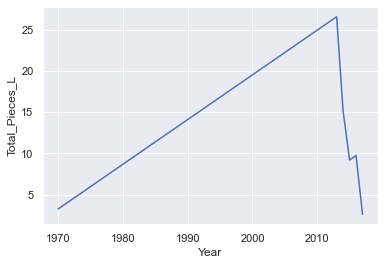

In [99]:
sns.lineplot(data=df_adv_sorted, x="Year", y="Total_Pieces_L")

In [100]:
# a map is needed to better illustrate this

## Economics Analysis

In [116]:
df_eco = pd.read_csv("plastic_economics.csv")
df_eco.describe()

,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste
count,192.000000,192.000000,192.000000,192.0
mean,1.642760,11.515625,33.973958,2.0
std,1.365327,3.320532,34.213288,0.0
min,0.140000,2.000000,0.000000,2.0
25%,0.790000,11.000000,0.000000,2.0
50%,1.240000,12.000000,22.000000,2.0
75%,2.100000,13.000000,73.250000,2.0
max,14.400000,25.000000,88.000000,2.0


In [117]:
df_eco.head()

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
0,Albania,LMI,"2,530,533",0.77,9.0,45.0,2.0,"1,948,510","174,392","77,897","3,488",0.032,"29,705","63,051"
1,Algeria,UMI,"16,556,580",1.20,12.0,58.0,2.0,"19,867,896","2,374,214","1,378,693","47,484",0.086,"520,555","1,017,444"
2,Angola,LMI,"3,790,041",0.48,13.0,71.0,2.0,"1,819,220","235,589","166,597","4,712",0.045,"62,528","136,770"
3,Anguilla,HIC,"14,561",2.10,12.0,2.0,2.0,"30,578","3,654",68,73,0.010,52,73
4,Antigua & Barbuda,HIC,"66,843",5.50,12.0,6.0,2.0,"367,637","43,933","2,555",879,0.051,"1,253","1,385"


In [118]:
df_eco[df_eco["Country"].isna()]

,Country,Economic status,Coastal population,Waste generation rate [kg/person/day],% Plastic in waste stream,% Inadequately managed waste,% Littered waste,Waste generation [kg/day],Plastic waste generation [kg/day],Inadequately managed plastic waste [kg/day],Plastic waste littered\n [kg/day],Mismanaged plastic waste [kg/person/day],Mismanaged plastic waste in 2010\n [tonnes],Mismanaged plastic waste in 2025\n [tonnes]
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,"31,865,274","69,143,290"


In [119]:
df_eco.isna().sum()

Country                                        1
Economic status                                1
Coastal population                             1
Waste generation rate [kg/person/day]          1
% Plastic in waste stream                      1
% Inadequately managed waste                   1
% Littered waste                               1
Waste generation [kg/day]                      1
Plastic waste generation [kg/day]              1
Inadequately managed plastic waste [kg/day]    1
Plastic waste littered\n [kg/day]              1
Mismanaged plastic waste [kg/person/day]       0
Mismanaged plastic waste in 2010\n [tonnes]    0
Mismanaged plastic waste in 2025\n [tonnes]    0
dtype: int64

In [120]:
df_eco_cleaned = df_eco.dropna(how="any")

In [121]:
df_eco_cleaned.isna().sum()

Country                                        0
Economic status                                0
Coastal population                             0
Waste generation rate [kg/person/day]          0
% Plastic in waste stream                      0
% Inadequately managed waste                   0
% Littered waste                               0
Waste generation [kg/day]                      0
Plastic waste generation [kg/day]              0
Inadequately managed plastic waste [kg/day]    0
Plastic waste littered\n [kg/day]              0
Mismanaged plastic waste [kg/person/day]       0
Mismanaged plastic waste in 2010\n [tonnes]    0
Mismanaged plastic waste in 2025\n [tonnes]    0
dtype: int64

In [122]:
df_eco_cleaned.columns

Index(['Country', 'Economic status', 'Coastal population',
       'Waste generation rate [kg/person/day]', '% Plastic in waste stream',
       '% Inadequately managed waste', '% Littered waste',
       'Waste generation [kg/day]', 'Plastic waste generation [kg/day]',
       'Inadequately managed plastic waste [kg/day]',
       'Plastic waste littered\n [kg/day]',
       'Mismanaged plastic waste [kg/person/day]',
       'Mismanaged plastic waste in 2010\n [tonnes]',
       'Mismanaged plastic waste in 2025\n [tonnes]'],
      dtype='object')

In [126]:
def remove_colon(s):
    return "".join(s.split(","))

In [127]:
df_eco_plot = df_eco_cleaned[["Country", "Economic status", "Mismanaged plastic waste [kg/person/day]", "Inadequately managed plastic waste [kg/day]", "Mismanaged plastic waste in 2010\n [tonnes]"]]
df_eco_plot["Mismanaged plastic waste [kg/person/day]"] = df_eco_plot["Mismanaged plastic waste [kg/person/day]"].apply(remove_colon)
df_eco_plot["Inadequately managed plastic waste [kg/day]"] = df_eco_plot["Inadequately managed plastic waste [kg/day]"].apply(remove_colon)
df_eco_plot["Mismanaged plastic waste in 2010\n [tonnes]"] = df_eco_plot["Mismanaged plastic waste in 2010\n [tonnes]"].apply(remove_colon)
df_eco_plot = df_eco_plot.astype({"Mismanaged plastic waste [kg/person/day]": float,
                                 "Inadequately managed plastic waste [kg/day]": float,
                                 "Mismanaged plastic waste in 2010\n [tonnes]": float})
df_eco_plot.dtypes

<ipython-input-127-e2f1acecd262>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco_plot["Mismanaged plastic waste [kg/person/day]"] = df_eco_plot["Mismanaged plastic waste [kg/person/day]"].apply(remove_colon)
<ipython-input-127-e2f1acecd262>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco_plot["Inadequately managed plastic waste [kg/day]"] = df_eco_plot["Inadequately managed plastic waste [kg/day]"].apply(remove_colon)
<ipython-input-127-e2f1acecd262>:4: SettingWithCopyWarning: 
A value is tr

Country                                         object
Economic status                                 object
Mismanaged plastic waste [kg/person/day]       float64
Inadequately managed plastic waste [kg/day]    float64
Mismanaged plastic waste in 2010\n [tonnes]    float64
dtype: object

In [129]:
df_eco_plot.columns

Index(['Country', 'Economic status',
       'Mismanaged plastic waste [kg/person/day]',
       'Inadequately managed plastic waste [kg/day]',
       'Mismanaged plastic waste in 2010\n [tonnes]'],
      dtype='object')

In [128]:
df_eco_plot.head()

,Country,Economic status,Mismanaged plastic waste [kg/person/day],Inadequately managed plastic waste [kg/day],Mismanaged plastic waste in 2010\n [tonnes]
0,Albania,LMI,0.032,77897.0,29705.0
1,Algeria,UMI,0.086,1378693.0,520555.0
2,Angola,LMI,0.045,166597.0,62528.0
3,Anguilla,HIC,0.010,68.0,52.0
4,Antigua & Barbuda,HIC,0.051,2555.0,1253.0


In [130]:
mis_per_person_sorted = df_eco_plot.sort_values(by="Mismanaged plastic waste [kg/person/day]", ascending=False).head(30)
inadeq_sorted = df_eco_plot.sort_values(by="Inadequately managed plastic waste [kg/day]", ascending=False).head(30)
status_agg = df_eco_plot.groupby("Economic status", as_index=False).agg("sum")

In [131]:
status_agg.head()

,Economic status,Mismanaged plastic waste [kg/person/day],Inadequately managed plastic waste [kg/day],Mismanaged plastic waste in 2010\n [tonnes]
0,HIC,0.768,609245.0,1194927.0
1,LI,0.947,6187348.0,2313566.0
2,LMI,3.783,36576230.0,13704528.0
3,UMI,3.021,38475774.0,14652256.0


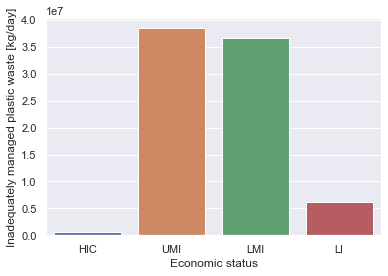

In [137]:
g_status_inadep = sns.barplot(data=status_agg, x="Economic status", y="Inadequately managed plastic waste [kg/day]", order=["HIC", "UMI", "LMI", "LI"])

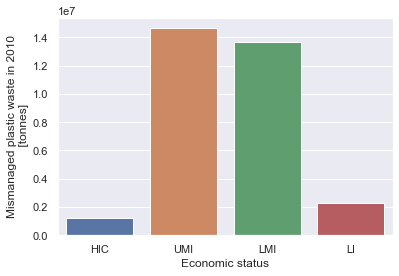

In [138]:
g_status_mis2010 = sns.barplot(data=status_agg, x="Economic status", y="Mismanaged plastic waste in 2010\n [tonnes]", order=["HIC", "UMI", "LMI", "LI"])

In [139]:
mis_per_person_sorted.head()

,Country,Economic status,Mismanaged plastic waste [kg/person/day],Inadequately managed plastic waste [kg/day],Mismanaged plastic waste in 2010\n [tonnes]
164,Sri Lanka,LMI,0.299,4256120.0,1591179.0
188,Vanuatu,LMI,0.245,60104.0,22478.0
76,Guyana,LMI,0.224,109084.0,42002.0
106,Maldives,LMI,0.220,83695.0,31469.0
177,Trinidad and Tobago,HIC,0.190,160103.0,94066.0


[Text(0, 0, 'Sri Lanka'),
 Text(1, 0, 'Vanuatu'),
 Text(2, 0, 'Guyana'),
 Text(3, 0, 'Maldives'),
 Text(4, 0, 'Trinidad and Tobago'),
 Text(5, 0, 'Tonga'),
 Text(6, 0, 'Comoros'),
 Text(7, 0, 'Fiji'),
 Text(8, 0, 'Marshall Islands'),
 Text(9, 0, 'Seychelles'),
 Text(10, 0, 'South Africa'),
 Text(11, 0, 'Mauritius'),
 Text(12, 0, 'Egypt'),
 Text(13, 0, 'Syria'),
 Text(14, 0, 'Saint Lucia'),
 Text(15, 0, 'Malaysia'),
 Text(16, 0, 'Thailand'),
 Text(17, 0, 'Tuvalu'),
 Text(18, 0, 'Guatemala'),
 Text(19, 0, 'Nauru')]

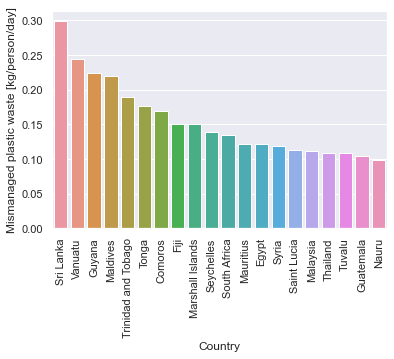

In [145]:
g_per_person = sns.barplot(data=mis_per_person_sorted.head(20), x="Country", y="Mismanaged plastic waste [kg/person/day]")
g_per_person.set_xticklabels(g_per_person.get_xticklabels(), rotation=90)

[Text(0, 0, 'China'),
 Text(1, 0, 'Indonesia'),
 Text(2, 0, 'Philippines'),
 Text(3, 0, 'Vietnam'),
 Text(4, 0, 'Sri Lanka'),
 Text(5, 0, 'Thailand'),
 Text(6, 0, 'Egypt'),
 Text(7, 0, 'Malaysia'),
 Text(8, 0, 'Nigeria'),
 Text(9, 0, 'Bangladesh'),
 Text(10, 0, 'South Africa'),
 Text(11, 0, 'India'),
 Text(12, 0, 'Algeria'),
 Text(13, 0, 'Pakistan'),
 Text(14, 0, 'Burma/Myanmar'),
 Text(15, 0, 'Turkey'),
 Text(16, 0, 'Brazil'),
 Text(17, 0, 'Morocco'),
 Text(18, 0, 'Korea, North'),
 Text(19, 0, 'Senegal')]

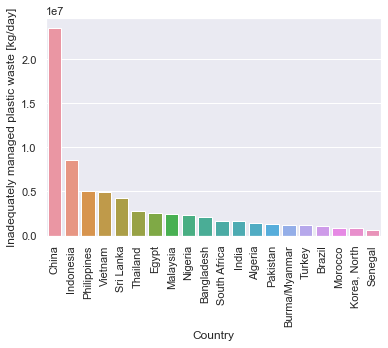

In [148]:
g_inadeq = sns.barplot(data=inadeq_sorted.head(20), x="Country", y="Inadequately managed plastic waste [kg/day]")
g_inadeq.set_xticklabels(g_inadeq.get_xticklabels(), rotation=90)